In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from FEM_Solver import FEM_Helmholtz

%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams["figure.autolayout"] = True

## Computing the solutions

In [2]:
# Parameters
f = lambda x: 0  # Source function
a, b = -1, +1,  # Domain

# Number of discretizations and frequencies
N_set = np.array([2 ** n for n in range(1, 13 + 1)])
k_set = np.linspace(1, 401, 9) * np.pi

errors = []
for k in k_set:
    errors_k = []

    # Exact solution and its derivative
    alpha, beta = 1 / np.pi, 5 / np.pi
    u = lambda x: alpha * np.cos(k * x) + 1j * beta * np.sin(k * x)
    u_x = lambda x: -alpha * k * np.sin(k * x) + 1j * beta * k * np.cos(k * x)

    # Boundary conditions
    ga = u_x(a) + 1j * k * u(a)
    gb = u_x(b) - 1j * k * u(b)

    # Numerical solutions
    for N in N_set:
        print('Solving for'
            + f' k = {round(k / np.pi)}π,'.ljust(10)
            + f' N = {N}'.ljust(9)
            + ' in progress...')

        solver = FEM_Helmholtz(f=f, k=k, a=a, b=b, ga=ga, gb=gb, N=N)
        solver.solve()
        r = solver.sol
        r_x = solver.der

        errors_k.append(solver.H1_error(u, u_x))

    errors.append(errors_k)

Solving for k = 1π, N = 2 in progress...
Solving for k = 1π, N = 4 in progress...
Solving for k = 1π, N = 8 in progress...
Solving for k = 1π, N = 16 in progress...
Solving for k = 1π, N = 32 in progress...


/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/scipy/special/orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/scipy/special/orthogonal.py:331: RuntimeWarning: invalid value encountered in double_scalars
  hn *= _gam(n + beta + 1.0) / _gam(n + 1) / _gam(n + ab1)
/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/scipy/special/orthogonal.py:332: RuntimeWarning: invalid value encountered in double_scalars
  kn = _gam(2 * n + ab1) / 2.0**n / _gam(n + 1) / _gam(n + ab1)


Solving for k = 1π, N = 64 in progress...
Solving for k = 1π, N = 128 in progress...
Solving for k = 1π, N = 256 in progress...
Solving for k = 1π, N = 512 in progress...
Solving for k = 1π, N = 1024 in progress...
Solving for k = 1π, N = 2048 in progress...
Solving for k = 1π, N = 4096 in progress...
Solving for k = 1π, N = 8192 in progress...
Solving for k = 51π, N = 2 in progress...
Solving for k = 51π, N = 4 in progress...
Solving for k = 51π, N = 8 in progress...
Solving for k = 51π, N = 16 in progress...
Solving for k = 51π, N = 32 in progress...
Solving for k = 51π, N = 64 in progress...
Solving for k = 51π, N = 128 in progress...
Solving for k = 51π, N = 256 in progress...
Solving for k = 51π, N = 512 in progress...
Solving for k = 51π, N = 1024 in progress...
Solving for k = 51π, N = 2048 in progress...
Solving for k = 51π, N = 4096 in progress...
Solving for k = 51π, N = 8192 in progress...
Solving for k = 101π, N = 2 in progress...
Solving for k = 101π, N = 4 in progress...


## Plotting rate of convergence

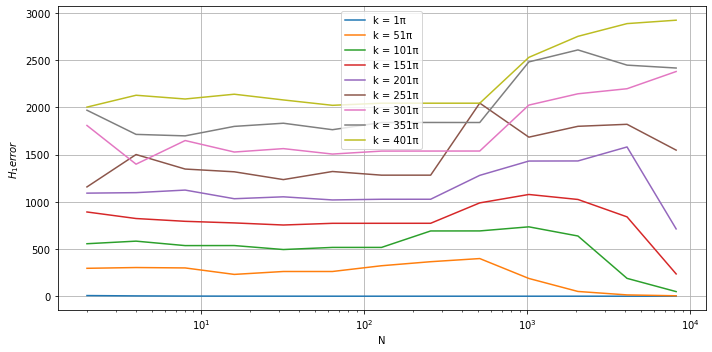

In [3]:
fig, axs = plt.subplots()
fig.tight_layout(pad=3.0)

for idx, k in enumerate(k_set):
    axs.plot(N_set, errors[idx], label=f'k = {round(k / np.pi)}π')
axs.set(xscale='log', xlabel='N', ylabel='$H_1 error$')
axs.grid()
axs.legend()
